# Project 1: Write A Data Science Blog Post
This project has the purpose to familiarize myself with the Data Science Process according to __CRISP-DM (Cross Industry Standard Process for Data Mining)__. Therefore I have choosen a AirBnB Dataset from Kaggle. This dataset was scraped for over an year and built on the 07th of November 2019 by Murray Cox. He runs a website https://insideairbnb.com/ where he provides similiar and updated datasets for several big cities that have many AirBnB accomodations. His project aims at demonstrating the bad influence of AirBnB to the housing market. It's definitly worth a visit.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from pyproj import Proj, Transformer
import tarfile
import os



## Business Understanding

In the first step I will question myself and a potential Business Use-Case, what I want to answer with this datasat. As this dataset includes geospatial data I will visualize them on maps to get a nice overview and moreover extract reasonable features from it. The questions I ask are:

  * Are the prices higher/lower in specific districts of Berlin?
  * Are the prices related to the ratings of a specific accomodation?
  * Are there accomodations that have a higher/lower availability for different times of the year?
  * Is it possible to model the highest price in dependency of the location with simple learning algorithms?.

## Data Understanding
Now I will go through the provided files and check the relevance of the included data to answer my questions.

In [2]:
def untar_file(filename):
    '''
    Will extract compressed files inside tar.gz files 
    
    INPUT:
    filename - Relative Filename of the compressed tar.gz
    
    OUTPUT:
      - will put the extracted files into the same folder as the compressed tar.gz was
    '''
    if (filename.endswith("tar.gz")):
        tar = tarfile.open(filename, "r:gz")
        tar.extractall()
        tar.close()

### Explore files and choose relevant observations

In [3]:
if not os.path.exists("neighbourhoods.csv"):
    untar_file("neighbourhoods.tar.gz")
df_nbh = pd.read_csv("neighbourhoods.csv")
df_nbh.head()

neighbourhood_group        neighbourhood
0  Charlottenburg-Wilm.            Barstraße
1  Charlottenburg-Wilm.  Charlottenburg Nord
2  Charlottenburg-Wilm.  Düsseldorfer Straße
3  Charlottenburg-Wilm.      Forst Grunewald
4  Charlottenburg-Wilm.            Grunewald

The File `neighbourhoods.csv` only maps the street of a single accomodation. This file is absolutely necessary to map a specific location to a disctrict.

In [4]:
if not os.path.exists("listings.csv"):
    untar_file("listings.tar.gz")
df_list = pd.read_csv("listings.csv")
df_list.head()

id                                              name  host_id host_name  \
0  2015  Berlin-Mitte Value! Quiet courtyard/very central     2217       Ian   
1  2695                Prenzlauer Berg close to Mauerpark     2986   Michael   
2  3176                   Fabulous Flat in great Location     3718    Britta   
3  3309                 BerlinSpot Schöneberg near KaDeWe     4108      Jana   
4  7071                  BrightRoom with sunny greenview!    17391    Bright   

      neighbourhood_group             neighbourhood   latitude  longitude  \
0                   Mitte           Brunnenstr. Süd  52.534537  13.402557   
1                  Pankow  Prenzlauer Berg Nordwest  52.548513  13.404553   
2                  Pankow   Prenzlauer Berg Südwest  52.534996  13.417579   
3  Tempelhof - Schöneberg           Schöneberg-Nord  52.498855  13.349065   
4                  Pankow            Helmholtzplatz  52.543157  13.415091   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt     60               4                118  2018-10-28   
1     Private room     17               2                  6  2018-10-01   
2  Entire home/apt     90              62                143  2017-03-20   
3     Private room     26               5                 25  2018-08-16   
4     Private room     42               2                197  2018-11-04   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               3.76                               4               141  
1               1.42                               1                 0  
2               1.25                               1               220  
3               0.39                               1               297  
4               1.75                               1                26

In [5]:
df_list.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365'],
      dtype='object')

In [6]:
df_list.shape

(22552, 16)

The File `listings.csv` gives the details about all the accomodations that are listed in AirBnB for Berlin. As it includes the __neighbourhood_group__ as well, the file `neighbourhoods.csv` and DataFrame __df_nbh__ won't be necessary anymore. 


In [7]:
if not os.path.exists("listings_summary.csv"):
    untar_file("listings_summary.tar.gz")
df_listsum = pd.read_csv("listings_summary.csv")
df_listsum.head()

id                        listing_url       scrape_id last_scraped  \
0  2015  https://www.airbnb.com/rooms/2015  20181107122246   2018-11-07   
1  2695  https://www.airbnb.com/rooms/2695  20181107122246   2018-11-07   
2  3176  https://www.airbnb.com/rooms/3176  20181107122246   2018-11-07   
3  3309  https://www.airbnb.com/rooms/3309  20181107122246   2018-11-07   
4  7071  https://www.airbnb.com/rooms/7071  20181107122246   2018-11-07   

                                               name  \
0  Berlin-Mitte Value! Quiet courtyard/very central   
1                Prenzlauer Berg close to Mauerpark   
2                   Fabulous Flat in great Location   
3                 BerlinSpot Schöneberg near KaDeWe   
4                  BrightRoom with sunny greenview!   

                                             summary  \
0  Great location!  30 of 75 sq meters. This wood...   
1                                                NaN   
2  This beautiful first floor apartment  is situa...   
3  First of all: I prefer short-notice bookings. ...   
4  Cozy and large room in the beautiful district ...   

                                               space  \
0  A+++ location! This „Einliegerwohnung“ is an e...   
1  In the summertime we are spending most of our ...   
2  1st floor (68m2) apartment on Kollwitzplatz/ P...   
3  Your room is really big and has 26 sqm, is ver...   
4  The BrightRoom is an approx. 20 sqm (215ft²), ...   

                                         description experiences_offered  \
0  Great location!  30 of 75 sq meters. This wood...                none   
1  In the summertime we are spending most of our ...                none   
2  This beautiful first floor apartment  is situa...                none   
3  First of all: I prefer short-notice bookings. ...                none   
4  Cozy and large room in the beautiful district ...                none   

                               neighborhood_overview  ... requires_license  \
0  It is located in the former East Berlin area o...  ...                t   
1                                                NaN  ...                t   
2  The neighbourhood is famous for its variety of...  ...                t   
3  My flat is in the middle of West-Berlin, direc...  ...                t   
4  Great neighborhood with plenty of Cafés, Baker...  ...                t   

  license jurisdiction_names instant_bookable is_business_travel_ready  \
0     NaN                NaN                f                        f   
1     NaN                NaN                f                        f   
2     NaN                NaN                t                        f   
3     NaN                NaN                f                        f   
4     NaN                NaN                f                        f   

           cancellation_policy  require_guest_profile_picture  \
0  strict_14_with_grace_period                              f   
1                     flexible                              f   
2  strict_14_with_grace_period                              f   
3  strict_14_with_grace_period                              f   
4                     moderate                              f   

  require_guest_phone_verification  calculated_host_listings_count  \
0                                f                               4   
1                                f                               1   
2                                f                               1   
3                                f                               1   
4                                f                               1   

   reviews_per_month  
0               3.76  
1               1.42  
2               1.25  
3               0.39  
4               1.75  

[5 rows x 96 columns]

In [8]:
df_listsum.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'name', 'summary',
       'space', 'description', 'experiences_offered', 'neighborhood_overview',
       'notes', 'transit', 'access', 'interaction', 'house_rules',
       'thumbnail_url', 'medium_url', 'picture_url', 'xl_picture_url',
       'host_id', 'host_url', 'host_name', 'host_since', 'host_location',
       'host_about', 'host_response_time', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_thumbnail_url',
       'host_picture_url', 'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'street',
       'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bathrooms',

In [9]:
df_listsum.shape

(22552, 96)

It seems `listings_summary.csv` got includes observations as `listings.csv` but many more columns. Therefore I will neglect `listings.csv`  and __df_list__.

In [10]:
if not os.path.exists("calendar_summary.csv"):
    untar_file("calendar_summary.tar.gz")
df_cal = pd.read_csv("calendar_summary.csv")
df_cal.head()

listing_id        date available price
0        2015  2019-09-10         f   NaN
1        2015  2019-09-09         f   NaN
2        2015  2019-09-08         f   NaN
3        2015  2019-09-07         f   NaN
4        2015  2019-09-06         f   NaN

In [11]:
df_cal.shape

(8231480, 4)

In [12]:
df_cal.date.min()

'2018-11-07'

In [13]:
df_cal.date.max()

'2019-11-08'

The file `calendar_summary.csv` is really interesting, as it scraped the daily price of an accomodation for almost over an year (between November 2018 and November 2019). Unfortunately, it seems, that price could only be scraped, if the accomodation is free and available.

We will go finally with two DataFrames __df_cal__ and __df_listsum__ into deeper analysis.

### Converting and Cleaning
The choosen Dataframe __df_listsum__ has a huge number of columns, I will cut it down to the columns that seems relevant for me.

In [14]:
df_acco = df_listsum[["id", 
                      "name", 
                      "neighbourhood_group_cleansed", 
                      "latitude", 
                      "longitude", 
                      "price",
                      "square_feet",
                      "number_of_reviews", 
                      "reviews_per_month", 
                      "availability_30", 
                      "availability_60",
                      "availability_90",
                      "availability_365",
                      "review_scores_rating"]]

The Price Column holds its values as strings. I have to convert them and will clean the empty strings:

In [15]:
df_acco.loc[:,"price"] = df_acco["price"].str.lstrip("$")
df_acco.loc[:,"price"] = df_acco["price"].str.rstrip("00")
df_acco.loc[:,"price"] = df_acco["price"].str.replace(".","")
df_acco.loc[:,"price"] = df_acco["price"].str.replace(",","")
df_acco.price[df_acco.price == ''] = np.NaN # suitable for building mean values, as NaN's will be ignored
df_acco.loc[:,"price"] = df_acco.price.astype(int)

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """
/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/opt/conda/lib/python3.7/site-packages/IP

### Dependency of price and review ratings with the district
Now I will have a deeper look into the data to extract reasonable features that are appropriate to answer my questions:

In [16]:
df_acco.groupby("neighbourhood_group_cleansed")["price"].mean().sort_values()

neighbourhood_group_cleansed
Neukölln                     46.567305
Reinickendorf                48.263158
Treptow - Köpenick           52.216807
Lichtenberg                  56.113372
Steglitz - Zehlendorf        56.327231
Marzahn - Hellersdorf        56.503546
Spandau                      58.233871
Friedrichshain-Kreuzberg     60.828816
Pankow                       67.822649
Mitte                        69.699417
Tempelhof - Schöneberg       96.572436
Charlottenburg-Wilm.        114.270729
Name: price, dtype: float64

The price means over the different districts are speaking a clear language. This indicates that there is a correlation between the location and the price of an accomodation.  

This [AirBnB Ratings and Reviews](https://deemly.co/products/trust-profile/review-data-sources/airbnb-ratings-and-reviews/) source says, that the __review_scores_rating__ should be already an calculated mean value of all other rating values. Therefore we can use it without merging all other rating data observations. I will show the same distribution as for the price:

In [17]:
df_acco.groupby("neighbourhood_group_cleansed")["review_scores_rating"].mean()

neighbourhood_group_cleansed
Charlottenburg-Wilm.        93.672566
Friedrichshain-Kreuzberg    94.562000
Lichtenberg                 94.323587
Marzahn - Hellersdorf       95.281818
Mitte                       93.757560
Neukölln                    94.623895
Pankow                      94.811157
Reinickendorf               94.123711
Spandau                     94.021277
Steglitz - Zehlendorf       95.087719
Tempelhof - Schöneberg      94.847444
Treptow - Köpenick          94.926566
Name: review_scores_rating, dtype: float64

We can see the price is very even distributed over all districts. Therefore it isn't further interesting to see the dependency between rating and location of the accomodation.

### Geographical Visualisation of price and location

There are some really heavy-priced accomodations (see the values for Maximum and Standard Derivation) that outliers with adversely impact on the whole price range. Therefore I will cut down the dataframe for visualisation for having reasonable prices only:

In [18]:
df_acco["price"].describe()

count    22552.000000
mean        67.143668
std        220.266210
min          0.000000
25%         30.000000
50%         45.000000
75%         70.000000
max       9000.000000
Name: price, dtype: float64

In [19]:
df_acco_pricevis = df_acco[(df_acco["price"] < 500) & (df_acco["price"] >= 10)]

In [20]:
df_acco_pricevis.loc[:,'price'] = df_acco_pricevis['price'].astype(str)

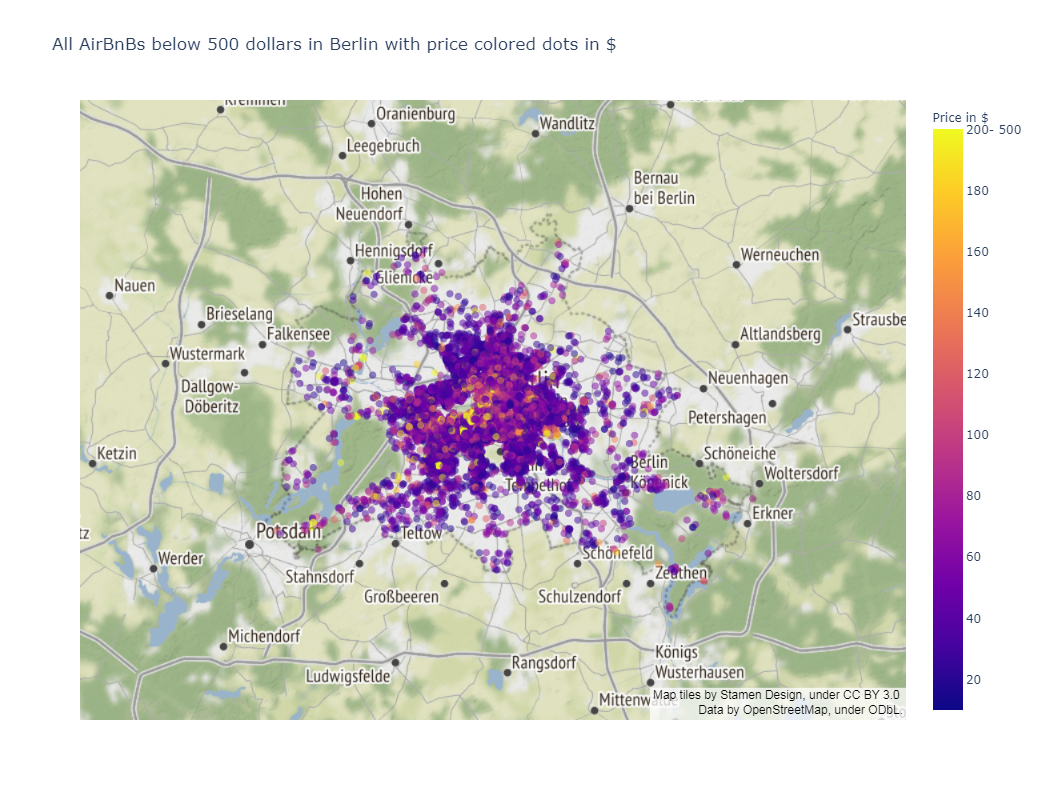

In [21]:
import plotly.graph_objects as go

# drawing the plot with Scattermapbox which is a plot type that is exclusively for visualizing geospatial data
fig = go.Figure(data=go.Scattermapbox(
    lat = df_acco_pricevis['latitude'],
    lon = df_acco_pricevis['longitude'],
    text="Price: "+ "$"+df_acco_pricevis['price'], 
    marker=dict(
            size=8,
            showscale=True,
            color=df_acco_pricevis['price'].astype(int),
            cmin=10,
            cmax=200,
            opacity= 0.5,
            colorbar=dict(
                title="Price in $",
                ticksuffix="- 500",
                showticksuffix="last"),
           
           
            ),
    
    ),
)

# update Layout to add title define the plot size and define the map focus and zoom level
fig.update_layout(
        title = 'All AirBnBs below 500 dollars in Berlin with price colored dots in $',
        width = 1300,
        height = 800,
     
        mapbox = {
            'center': {'lon': 13.401, 'lat': 52.512},
            'style': "stamen-terrain",
            'zoom': 9},
       
)


fig.show()

From this visualisation it seems, the cheapest accomodations are in the south and in the north of berlin. This distribution should be suitable for building a model and predicting the price in dependency of the location.

### Correlation of Price and Review Score

In [22]:
df_acco["price"].corr(df_acco["review_scores_rating"])

-0.013030700746081985

The price and the reviews have absolutely not any relevant correlation. That's interesting as I would have suggested, that a cheaper accomodation gets a better rating.

### Dependency of availability and time of the year
As we have the daily availability of all Berlin AirBnB accomodations for one year to hand, we can check the availability of the accomodations for every month.

In [23]:
df_cal[df_cal.available == "t"].head()

listing_id        date available   price
128        2015  2019-05-05         t  $76.00
129        2015  2019-05-04         t  $76.00
130        2015  2019-05-03         t  $76.00
131        2015  2019-05-02         t  $76.00
132        2015  2019-05-01         t  $78.00

As I want to visualize the availabilty I will take only a small sample from __df_acco__.

In [24]:
acco_sample = df_acco.sample(300)
# take the calendar entries for the listing id's I sampled above
df_cal_sample = df_cal[df_cal.listing_id.isin(acco_sample["id"])].reset_index()


In [25]:
df_cal_sample["date"] = pd.to_datetime(df_cal_sample["date"])

For getting the 12 months as an additional category I extract the month string from the already existing date:

In [26]:
df_cal_sample["month"] = df_cal_sample.date.apply(lambda x: x.strftime("%b"))

Now I will create an multidimensional DataFrame that shows the availability in dependence of the month and the id of the accomodation:

In [27]:
df_2d_month_avail = df_cal_sample.groupby(["month","listing_id"])["available"].value_counts().unstack().drop(columns="f").unstack().fillna(0)

In [28]:
df_2d_month_avail = df_2d_month_avail.stack().reindex(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], level="month").unstack()

It seems many owners of AirBnB accomodations are providing their offer only for short terms. These are not useful for plotting a trend over the whole year. Therefore I'm filtering for accomodations that are offered for at least 100 days in a year: 

In [29]:
columns = []
for col in df_2d_month_avail.columns:
    
    if df_2d_month_avail[col].sum() > 100:
        columns.append(col)
        
df_2d_month_avail = df_2d_month_avail[columns]

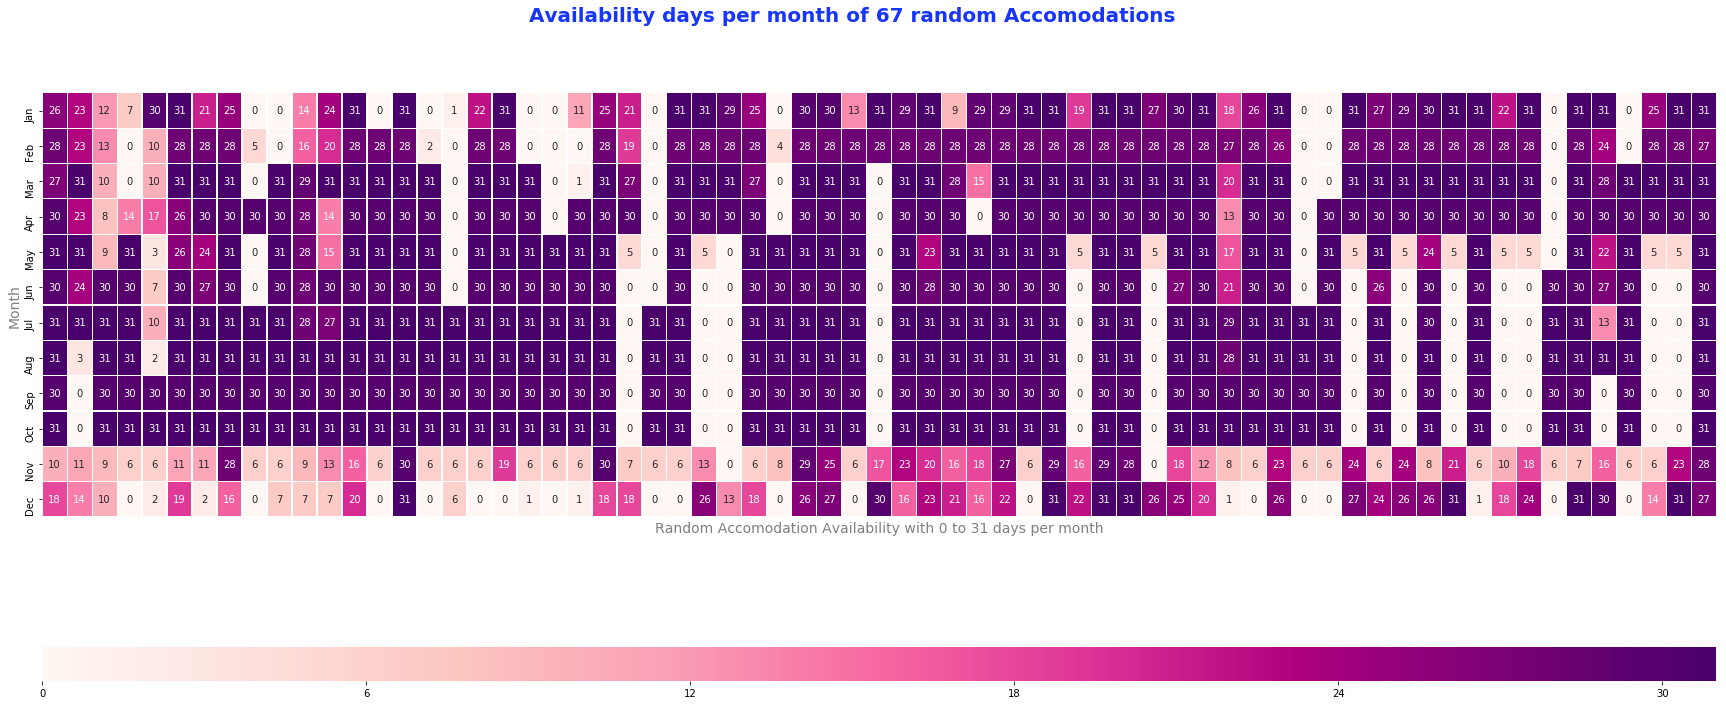

In [30]:
fig1, ax = plt.subplots(figsize=(30, 12))

# adding title and define title style
plt.suptitle('Availability days per month of {} random Accomodations'.format(len(df_2d_month_avail.columns)), 
             color="#1736fa",
             fontsize=20, 
             fontweight='bold')

# some settings for the colorbar of the plot
cbar_kws = {'orientation':"horizontal", 'pad':0.2, 'aspect':50}

# drawing the plot
sb.heatmap(df_2d_month_avail, annot=True, linewidths=.3, ax=ax, cmap='RdPu', cbar_kws=cbar_kws);

# add labels for x-axis and y-axis and remove x-ticks as the actual listing-id isn't relevant
plt.xlabel("Random Accomodation Availability with 0 to 31 days per month", color="grey", fontsize=14)
plt.ylabel("Month", color="grey", fontsize=14)
plt.xticks([], []);

We can see a trend that the most accomodations have their highest availability during the sommer months. It's surprising for me because I would have stated otherwise that the summer should have the highest amount of visitors in Berlin and therefore a low availability of AirBnB offers.
I assume, this is due to the habits of the tenants that are offering their flat. During the summer they are leaving Berlin for longer terms and therefore offering their flat to AirBnB for longer terms. In the winter many people will stay at home and therefore not offering to AirBnB.

The insight is nice but in my opinion this isn't suitable for an learning model as there is a big unsteadiness in the different observations.

## Data Preperation
As I have decided to use the location and price data for learning and prediction with a model, I will prepare the data for this occasion.

As a first step I will cut out all accomodations that are offered for zero dollars. I guess this is due to scraping failures.

In [31]:
df_lr = df_acco.copy()
df_lr = df_lr[df_lr["price"] != 0]

### Converting Coordinates

Now I will convert the radial coordinates in Longitude and Latitude to Mercator coordinates as they have a linear mapping. I'm assuming the linear distances between the coordinates are easier to handle:

In [32]:
def convert_coords(coords):
    '''
    Will convert a DataFrame of Longitude and Latitude coordinates to a list of tuples
    with Mercator coordinates
    
    INPUT:
    coords - 2-columned DataFrame like df[['lon', 'lat']]
    
    OUTPUT:
    list of tuples - every tuple represents a pair of transformed Mercator coordinates
                     that can be pushed back into the df like this:
                        merc = convert_coords(df[['longitude','latitude']])
                        df['merc_x'] = [x[0] for x in merc]
                        df['merc_y'] = [x[1] for x in merc]
    '''
    
    transformer = Transformer.from_crs(4326, 3857)
    long_lat = [tuple(x) for x in coords.values]

    merc_xy= transformer.itransform(long_lat)
    
    return list(merc_xy)

merc = convert_coords(df_lr[['longitude','latitude']])
df_lr['merc_x'] = [x[0] for x in merc]
df_lr['merc_y'] = [x[1] for x in merc]

### Bucketize Coordinates and Prices

I will bucketize the coordinates and the prices as well to generate multiple categories. This allows me to compare continuous and categorical input/result data. The choosen steps can be seen in the following lines as they creating nice distributions over the bucketized categories:

In [33]:
# steps for mercator coordinate buckets
coord_step = 5000

# steps for price buckets
price_step = 30

# lambda functions for applying the buckets to a dataframe column
coord_to_bin = lambda x: np.floor(x / coord_step) * coord_step
price_to_bin = lambda x: np.floor(x /price_step) * price_step

# create buckets for mercator x-axis and y-axis
df_lr["merc_x_bin"] = df_lr.merc_x.map(coord_to_bin)
df_lr["merc_y_bin"] = df_lr.merc_y.map(coord_to_bin)

# generate unique coordinate categories by concating the buckets for x-axis and y-axis
df_lr["merc_cat"] = df_lr["merc_x_bin"].astype(str) + "_" + df_lr["merc_y_bin"].astype(str)
df_lr["price_cat"] = df_lr.price.map(price_to_bin)

# create 2-dimensional DataFrame with the mean prices for every coordinate category for easy visualization
bucket_vals = df_lr.groupby(["merc_x_bin", "merc_y_bin"])["price"].mean()
bucket_vals_2d = bucket_vals.unstack().fillna(0)

### Evaluate choosen values for bucketizing

In [34]:
df_lr["price_cat"].value_counts()

30.0      10316
0.0        4436
60.0       4391
90.0       1673
120.0       711
150.0       374
180.0       235
240.0       107
210.0        73
270.0        38
300.0        34
330.0        26
390.0        25
6000.0       20
480.0        17
450.0         8
570.0         7
870.0         6
540.0         5
990.0         5
360.0         5
630.0         4
420.0         3
2220.0        3
510.0         2
4980.0        2
780.0         2
600.0         2
2490.0        2
1500.0        1
4230.0        1
900.0         1
8580.0        1
1230.0        1
660.0         1
1050.0        1
7980.0        1
1860.0        1
9000.0        1
3000.0        1
1890.0        1
Name: price_cat, dtype: int64

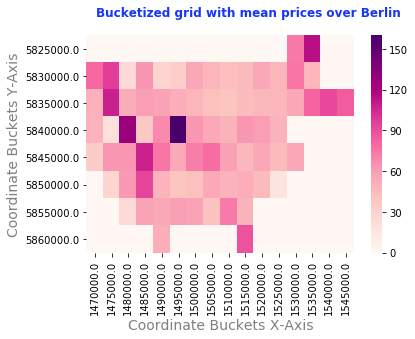

In [35]:
# add title for visualization
plt.suptitle('Bucketized grid with mean prices over Berlin'.format(len(bucket_vals_2d.columns)), color="#1736fa",fontsize=12, fontweight='bold')

# drawing the heatmap
sb.heatmap(bucket_vals_2d, cmap='RdPu');

# adding x-labels and y-labels
plt.xlabel("Coordinate Buckets X-Axis", color="grey", fontsize=14)
plt.ylabel("Coordinate Buckets Y-Axis", color="grey", fontsize=14);


We can clearly see the different pricing levels across the geographical bins of berlin. 

### Dummy categorical values

For fitting an learning model I have to dummy my newly created categorical features:

In [36]:
def create_dummy_df(df, cat_cols, dummy_na):
    '''
    Will dummy categorical columns into columns 
    
    INPUT:
    df - pandas dataframe with categorical variables you want to dummy
    cat_cols - list of strings that are associated with names of the categorical columns
    dummy_na - Bool holding whether you want to dummy NA vals of categorical columns or not
    
    OUTPUT:
    df - a new dataframe that has the following characteristics:
            * contains all columns that were not specified as categorical
            * removes all the original columns in cat_cols
            * dummy columns for each of the categorical columns in cat_cols
            * if dummy_na is True - it also contains dummy columns for the NaN values
            * Use a prefix of the column name with an underscore (_) for separating 
    '''
    for col in  cat_cols:
        try:
            # for each cat add dummy var, drop original column
            df = pd.concat([df.drop(col, axis=1), pd.get_dummies(df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=dummy_na)], axis=1)
        except:
            continue
    return df

df_lr_merc_cat = df_lr[["merc_cat", "price"]]

df_lr_merc_cat = create_dummy_df(df_lr_merc_cat, ["merc_cat"], dummy_na=False)

## Modelling and Evaluation

### Linear Regression with binned geographic coordinates

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error

In [38]:
X = df_lr_merc_cat.drop(columns="price")
y = df_lr_merc_cat['price']

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state=42) 

# Instantiate
lm_model = LinearRegression(normalize=True) 

#Fit
lm_model.fit(X_train, y_train) 
        
#Predict and score the model
y_test_preds = lm_model.predict(X_test) 
"The r-squared score for the model using only categoric variables was {} on {} values.".format(r2_score(y_test, y_test_preds), len(y_test))

'The r-squared score for the model using only categoric variables was 0.007732850658267343 on 6764 values.'

According to my mentors feedback and this post [Can GPS coordinates Latitude and Longitude ...](https://datascience.stackexchange.com/questions/23651/can-gps-coordinates-latitude-and-longitude-be-used-as-features-in-a-linear-mod) it's not possible to use geographical data in a linear model or binned geographical data because of different reasons, for example they have no linear relationship as geographical coordinates doesn't have any numeric dependencies to each other.
 

### K nearest neighbours (KNN) against Mercator Coordinates and price

Following the [Tutorial on applying KNN for geocoordinates](https://www.kaggle.com/xchiron/rental-list-knn-on-lat-long-data) I'm trying to obtain better results using the K-nearest-neighbours algorithm as it's suitable for non-linear input data. I will try to predict the continious prices using a KNN Regressor at first:

In [39]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn import metrics

#### KNN Regressor with Continuous prices

In [40]:
X = df_lr[["merc_x", "merc_y"]]
y = df_lr["price"]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=45)

# Instantiate
neigh = KNeighborsRegressor(n_neighbors=50)

#Fit
neigh.fit(X_train, y_train)

#Predict and score the model
y_pred = neigh.predict(X_test)
"The r-squared score for the model using only categoric variables was {} on {} values.".format(r2_score(y_test, y_pred), len(y_test))

'The r-squared score for the model using only categoric variables was 0.10222066806957508 on 7440 values.'

The r-squared score for the KNN Regressor has become a bit better but is far away from beeing good. I guess the KNN Regressor isn't suitable for this kind of input data. I will now try the KNN Classifier against a response vector with binned price categories. I used 30$ as a stepper to categorize the prices in several categories:

#### KNN Classifier with Prices in binned Categories 

In [41]:
X = df_lr[["merc_x", "merc_y"]]
y = df_lr["price_cat"]

#Split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Instantiate
neigh = KNeighborsClassifier(n_neighbors=80)

#Fit
neigh.fit(X_train, y_train)

#Predict and score the model
y_pred=neigh.predict(X_test)
print("Accuracy: {:.2f}%".format(100*metrics.accuracy_score(y_test, y_pred)))

Accuracy: 44.35%


This test score isn't quite good as well but it sounds reasonable and could be enhanced with some additional modification like normalization or additional input variables. Therefore I can say, that it's useful to add more input variables than the coordinates to the KNN Classfier and apply multiple modifications for this dataset. 